# Density Estimation - Non Parametric

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

from miniml.denestimation.nonparametric import *

## Kernel Density Estimation (KDE) Method

**1 dimension**

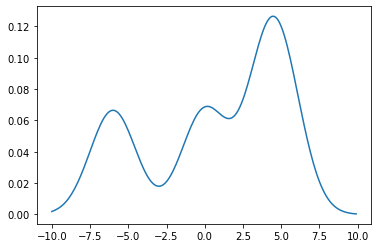

In [2]:
kde = KDE(np.array([[-6], [0], [4], [5]]))
kde.fit(kernel='Gaussian', h=1.5)

x = np.arange(-10, 10, 0.1)
_ = plt.plot(x, kde.predict(np.array(list(x))))

**2 dimension**

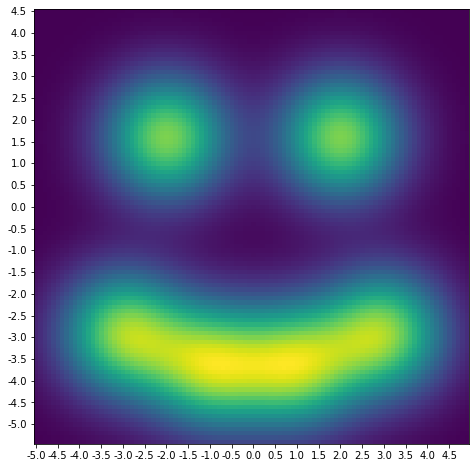

In [3]:
data = np.array([[-2, 2], [2, 2], [-3, -2.5], [3, -2.5], [-1, -3.25], [1, -3.25]])
kde = KDE(data)
kde.fit(kernel='Gaussian', h=1)

xmin, xmax = -5, 5
ymin, ymax = -5, 5
inc = 0.1

plt.figure(figsize=(8, 8))

(x, y) = np.meshgrid(np.arange(xmin, xmax, inc), np.arange(ymin, ymax, inc))
xy = np.hstack((x.reshape(x.shape[0]*x.shape[1], 1, order='F'), 
                y.reshape(y.shape[0]*y.shape[1], 1, order='F')))

len_x = int((xmax-xmin)/inc)
len_y = int((ymax-ymin)/inc)

plt.xticks(np.arange(0, len_x, 5), map(lambda x: round(x,1), np.arange(xmin, xmax, inc*5)))
plt.yticks(np.arange(0, len_y, 5)[::-1], map(lambda x: round(x,1), np.arange(ymin, ymax, inc*5)))
_ = plt.imshow(np.rot90(kde.predict(xy).reshape(len_x, len_y)))

## K-Nearest Neighbors (KNN) Method

**1 dimension**

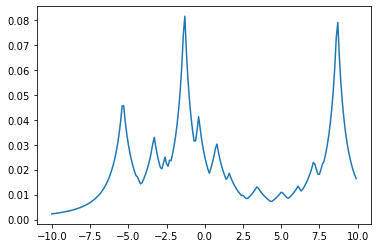

In [4]:
data = np.array([[random.uniform(-10, 10)] for _ in range(20)])
knn = KNN(data)
knn.fit(k=5)

x = np.arange(-10, 10, 0.1).reshape(-1,1)
_ = plt.plot(x, knn.predict(np.array(list(x))))

**2 dimension**

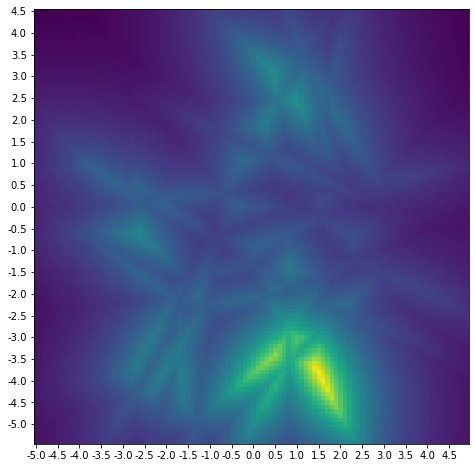

In [5]:
data = np.array([[random.uniform(-5, 5), random.uniform(-5, 5)] for _ in range(20)])
knn = KNN(data)
knn.fit(k=6)

xmin, xmax = -5, 5
ymin, ymax = -5, 5
inc = 0.1

plt.figure(figsize=(8, 8))

(x, y) = np.meshgrid(np.arange(xmin, xmax, inc), np.arange(ymin, ymax, inc))
xy = np.hstack((x.reshape(x.shape[0]*x.shape[1], 1, order='F'), 
                y.reshape(y.shape[0]*y.shape[1], 1, order='F')))

len_x = int((xmax-xmin)/inc)
len_y = int((ymax-ymin)/inc)

plt.xticks(np.arange(0, len_x, 5), map(lambda x: round(x,1), np.arange(xmin, xmax, inc*5)))
plt.yticks(np.arange(0, len_y, 5)[::-1], map(lambda x: round(x,1), np.arange(ymin, ymax, inc*5)))
_ = plt.imshow(np.rot90(knn.predict(xy).reshape(len_x, len_y)))